In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("Solarize_Light2")
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("Forbes_2000_top_company_CLNQ11.csv")
df

,2022 Ranking,Organization Name,Industry,Country,Year Founded,CEO,Revenue (Billions),Profits (Billions),Assets (Billions),Market Value (Billions),Total Employees
0,1,Berkshire Hathaway,Diversified Financials,United States,1939,Warren Edward Buffett,276.09,89.80,958.78,741.48,372000.0
1,2,ICBC,Banking,China,1984,Shu Gu,208.13,54.03,5518.51,214.42,449296
2,3,Saudi Arabian Oil Company (Saudi Aramco),Oil & Gas Operations,Saudi Arabia,1933,Amin bin Hasan Al-Nasser,400.38,105.36,576.04,2292.08,68493.0
3,4,JPMorgan Chase,Diversified Financials,United States,2000,Jamie Dimon,124.54,42.12,3954.69,374.45,271025.0
4,5,China Construction Bank,Banking,China,2014,Wang Zuji,202.07,46.89,4746.95,181.32,352621
...,...,...,...,...,...,...,...,...,...,...,...
1994,1995,Aperam,Materials,Luxembourg,2010,Timoteo di Maulo,6.03,1.14,6.72,3.16,0
1995,1995,Shenzhen Feima International Supply Chain,Business Services & Supplies,China,1998,Shan Min Huang,0.04,1.41,0.17,1.14,306.0
1996,1997,NMDC,Materials,India,1958,Sumit Deb,3.52,1.41,5.72,6.40,16944.0
1997,1997,Sichuan Changhong Electric,Consumer Durables,China,1988,Wei Li,15.72,0.05,12.10,1.96,51841.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1999 entries, 0 to 1998
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   2022 Ranking             1999 non-null   int64  
 1   Organization Name        1999 non-null   object 
 2   Industry                 1999 non-null   object 
 3   Country                  1999 non-null   object 
 4   Year Founded             1999 non-null   int64  
 5   CEO                      1999 non-null   object 
 6   Revenue (Billions)       1999 non-null   float64
 7   Profits (Billions)       1999 non-null   float64
 8   Assets (Billions)        1999 non-null   float64
 9   Market Value (Billions)  1999 non-null   float64
 10  Total Employees          1999 non-null   object 
dtypes: float64(4), int64(2), object(5)
memory usage: 171.9+ KB


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
2022 Ranking,1999.0,999.818409,577.098137,1.00,500.500,1000.00,1499.00,1999.00
Year Founded,1999.0,1863.992496,421.815723,0.00,1919.000,1971.00,1996.00,2022.00
Revenue (Billions),1999.0,23.886628,40.951362,0.00,5.600,12.17,23.73,572.75
Profits (Billions),1999.0,2.503167,6.160483,-12.05,0.590,1.06,2.27,105.36
Assets (Billions),1999.0,117.176013,363.826515,0.17,14.800,32.10,77.88,5518.51
Market Value (Billions),1999.0,38.260675,117.233301,0.14,7.335,16.64,34.72,2640.32


In [5]:
df.describe(exclude="number").T

,count,unique,top,freq
Organization Name,1999,1999,Berkshire Hathaway,1
Industry,1999,29,Banking,289
Country,1999,57,United States,584
CEO,1999,1963,No Data,23
Total Employees,1999,1748,0,66


In [6]:
#checking nullvalues
df.isnull().sum()

2022 Ranking               0
Organization Name          0
Industry                   0
Country                    0
Year Founded               0
CEO                        0
Revenue (Billions)         0
Profits (Billions)         0
Assets (Billions)          0
Market Value (Billions)    0
Total Employees            0
dtype: int64

In [7]:
df.nunique()

2022 Ranking               1684
Organization Name          1999
Industry                     29
Country                      57
Year Founded                214
CEO                        1963
Revenue (Billions)         1587
Profits (Billions)          688
Assets (Billions)          1790
Market Value (Billions)    1665
Total Employees            1748
dtype: int64

### Year_Founded

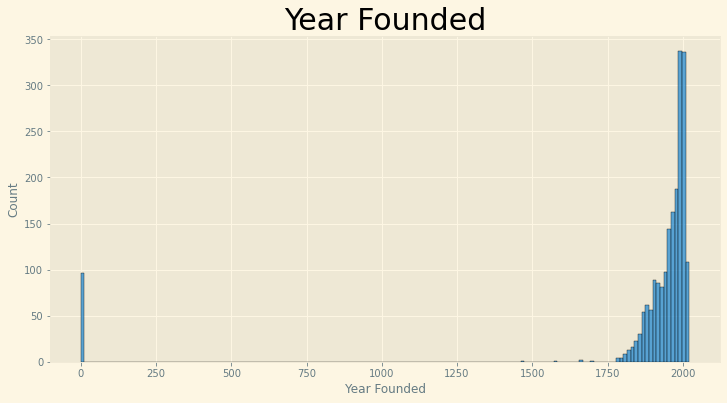

In [8]:
plt.figure(figsize=(12,6))
sns.histplot(x="Year Founded",data=df)
plt.title("Year Founded",fontsize=30)
plt.show()

In [9]:
#Grouping the years in 5
df["Year Founded_group_q"]= pd.qcut(df["Year Founded"],5)
df["Year Founded_group_q"]

0       (1905.0, 1955.0]
1       (1955.0, 1985.0]
2       (1905.0, 1955.0]
3       (1999.0, 2022.0]
4       (1999.0, 2022.0]
              ...       
1994    (1999.0, 2022.0]
1995    (1985.0, 1999.0]
1996    (1955.0, 1985.0]
1997    (1985.0, 1999.0]
1998    (-0.001, 1905.0]
Name: Year Founded_group_q, Length: 1999, dtype: category
Categories (5, interval[float64, right]): [(-0.001, 1905.0] < (1905.0, 1955.0] < (1955.0, 1985.0] < (1985.0, 1999.0] < (1999.0, 2022.0]]

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1999 entries, 0 to 1998
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   2022 Ranking             1999 non-null   int64   
 1   Organization Name        1999 non-null   object  
 2   Industry                 1999 non-null   object  
 3   Country                  1999 non-null   object  
 4   Year Founded             1999 non-null   int64   
 5   CEO                      1999 non-null   object  
 6   Revenue (Billions)       1999 non-null   float64 
 7   Profits (Billions)       1999 non-null   float64 
 8   Assets (Billions)        1999 non-null   float64 
 9   Market Value (Billions)  1999 non-null   float64 
 10  Total Employees          1999 non-null   object  
 11  Year Founded_group_q     1999 non-null   category
dtypes: category(1), float64(4), int64(2), object(5)
memory usage: 174.1+ KB


In [11]:
YFGQ=df.groupby('Year Founded_group_q')['Organization Name'].agg(['count'])
YFGQ

,count
Year Founded_group_q,
"(-0.001, 1905.0]",407
"(1905.0, 1955.0]",402
"(1955.0, 1985.0]",409
"(1985.0, 1999.0]",413
"(1999.0, 2022.0]",368


array([<AxesSubplot:ylabel='count'>], dtype=object)

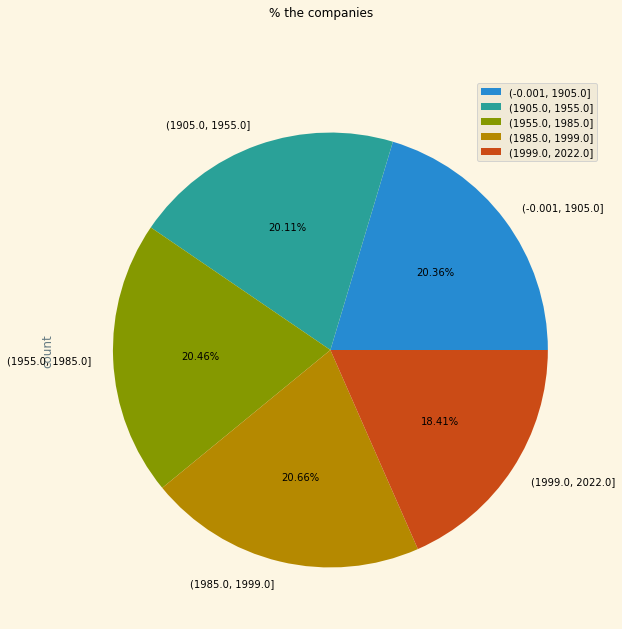

In [12]:
YFGQ.plot(kind='pie',autopct='%1.2f%%',subplots=True,title='% the companies',figsize=(10,10))

Most organizations were developed between 1985 and 1999

In [33]:
def Year_Founded(x):
    if x <= 1500 :
        x = "the company is more than 500 y/o"
    elif x >1501 and x <=1750:
        x= 'companies from 499 to 272 y/o'
    elif x >1751 and x <=1850:
        x= 'companies from 271 to 172 y/o'
    elif x >1851 and x <=2000:
        x= 'companies from 171 to 22 y/o'
    else:
        x= 'companies under the age of 22'
    return x

In [34]:
df["Year_Founded"] = df["Year Founded"].apply(Year_Founded)
df["Year_Founded"]

0           companies from 171 to 22 y/o
1           companies from 171 to 22 y/o
2           companies from 171 to 22 y/o
3           companies from 171 to 22 y/o
4          companies under the age of 22
                      ...               
1994       companies under the age of 22
1995        companies from 171 to 22 y/o
1996        companies from 171 to 22 y/o
1997        companies from 171 to 22 y/o
1998    the company is more than 500 y/o
Name: Year_Founded, Length: 1999, dtype: object

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1999 entries, 0 to 1998
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   2022 Ranking             1999 non-null   int64   
 1   Organization Name        1999 non-null   object  
 2   Industry                 1999 non-null   object  
 3   Country                  1999 non-null   object  
 4   Year Founded             1999 non-null   int64   
 5   CEO                      1999 non-null   object  
 6   Revenue (Billions)       1999 non-null   float64 
 7   Profits (Billions)       1999 non-null   float64 
 8   Assets (Billions)        1999 non-null   float64 
 9   Market Value (Billions)  1999 non-null   float64 
 10  Total Employees          1999 non-null   object  
 11  Year Founded_group_q     1999 non-null   category
 12  Year_Founded             1999 non-null   object  
dtypes: category(1), float64(4), int64(2), object(6)
memory usage: 1

In [16]:
df["Year_Founded"].value_counts()

companies from 171 to 22 y/o        1498
companies under the age of 22        333
the company is more than 500 y/o      97
companies from 271 to 172 y/o         67
companies from 499 to 272 y/o          4
Name: Year_Founded, dtype: int64

Text(0, 0.5, 'Market Value (Billions)')

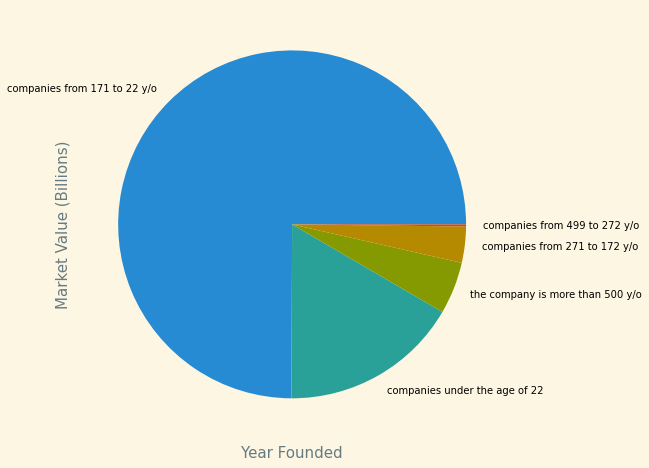

In [17]:
df["Year_Founded"].value_counts().plot(kind="pie",figsize=(8,8))
plt.xlabel("Year Founded",fontsize=15)
plt.ylabel("Market Value (Billions)", fontsize=15)

### Analysis of the number of companies in different countries and top 5 countries

Text(0.5, 1.0, 'Number of companies from all countries')

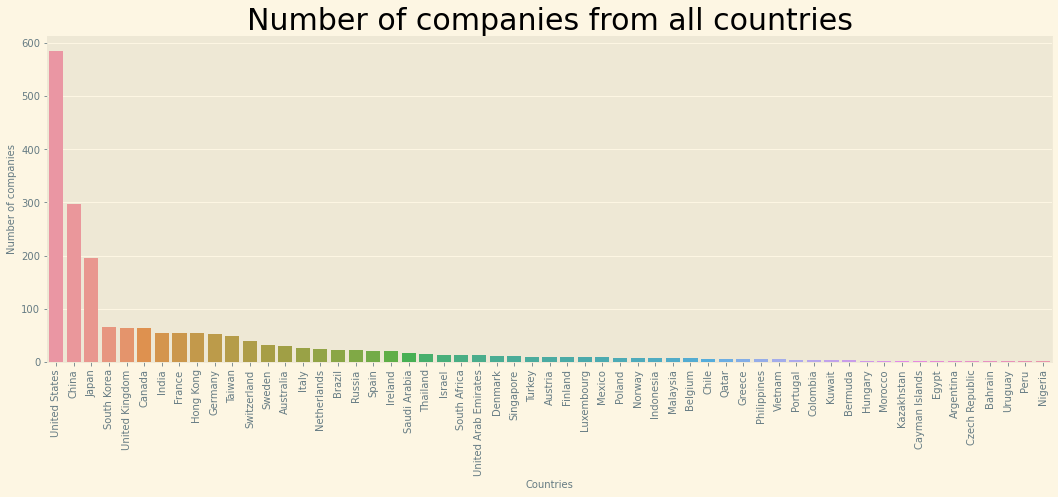

In [18]:
plt.figure(figsize=(18,6))
sns.countplot(data=df, x="Country", order=df['Country'].value_counts().index)
plt.xticks(rotation=90)
plt.ylabel("Number of companies", fontsize=10)
plt.xlabel("Countries", fontsize=10)
plt.title("Number of companies from all countries", fontsize=30)

In [19]:
df["Country"].value_counts().head()

United States     584
China             297
Japan             196
South Korea        65
United Kingdom     64
Name: Country, dtype: int64

### Detailed analysis of revenue, profit, assets and market value of companies in all countries¶

#### Revenue 

Text(0, 0.5, 'Countries')

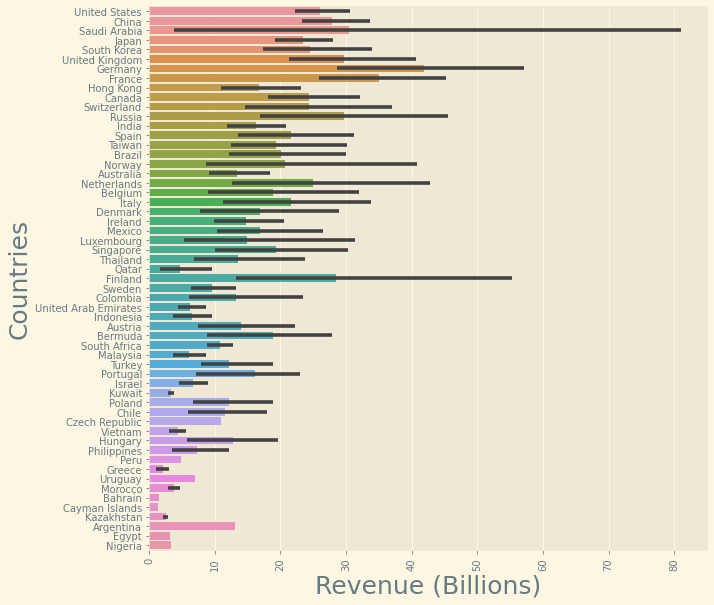

In [20]:
plt.figure(figsize=(10,10))
sns.barplot(data=df,x="Revenue (Billions)",y="Country")
plt.xticks(rotation=90)
plt.xlabel("Revenue (Billions)", fontsize=25)
plt.ylabel("Countries", fontsize=25)

#### Profits per Country

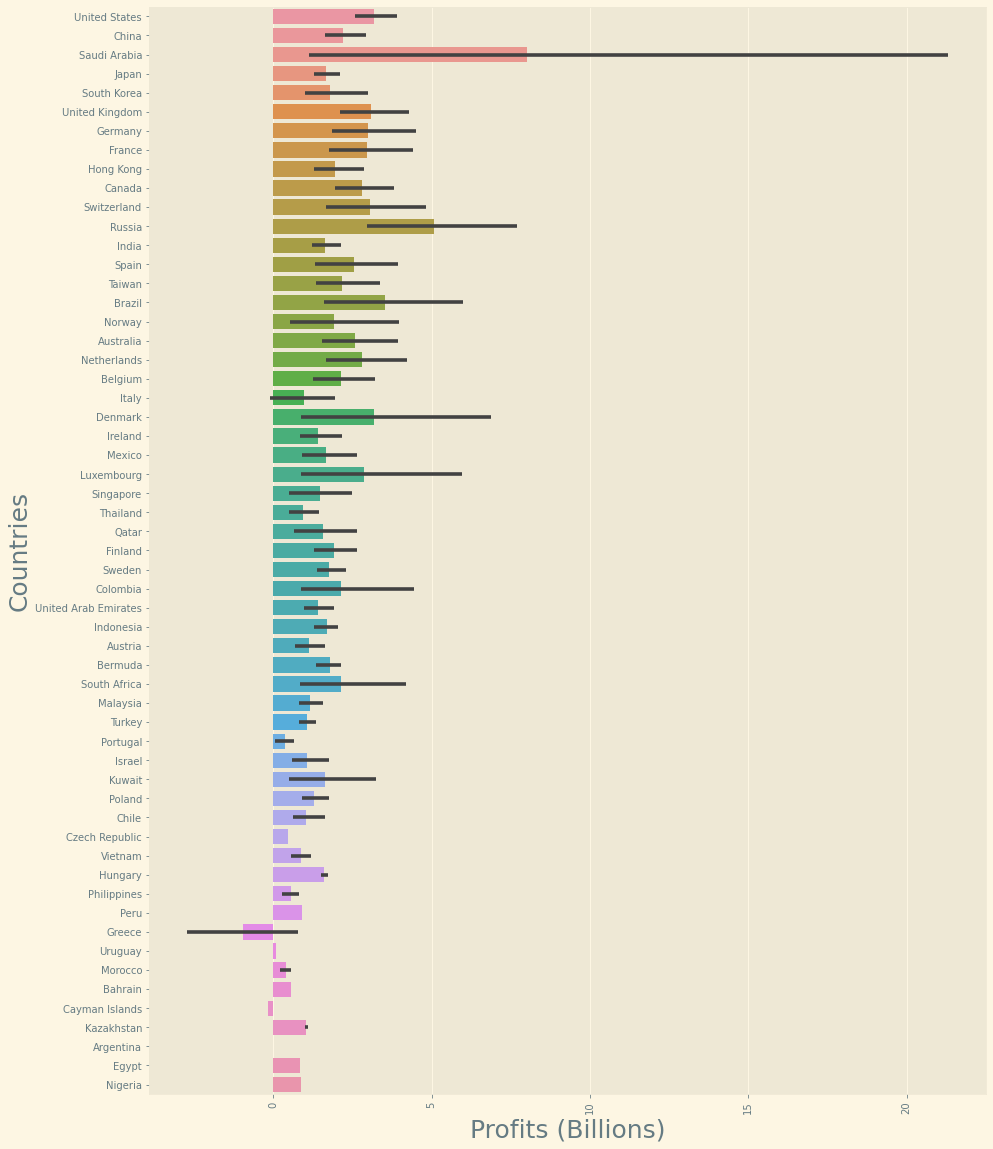

In [21]:
plt.figure(figsize=(15,20))
sns.barplot(data=df, x = "Profits (Billions)", y = "Country")
plt.xticks(rotation=90)
plt.xlabel("Profits (Billions)", fontsize=25)
plt.ylabel("Countries", fontsize=25)
plt.show()

#### Assets per Country

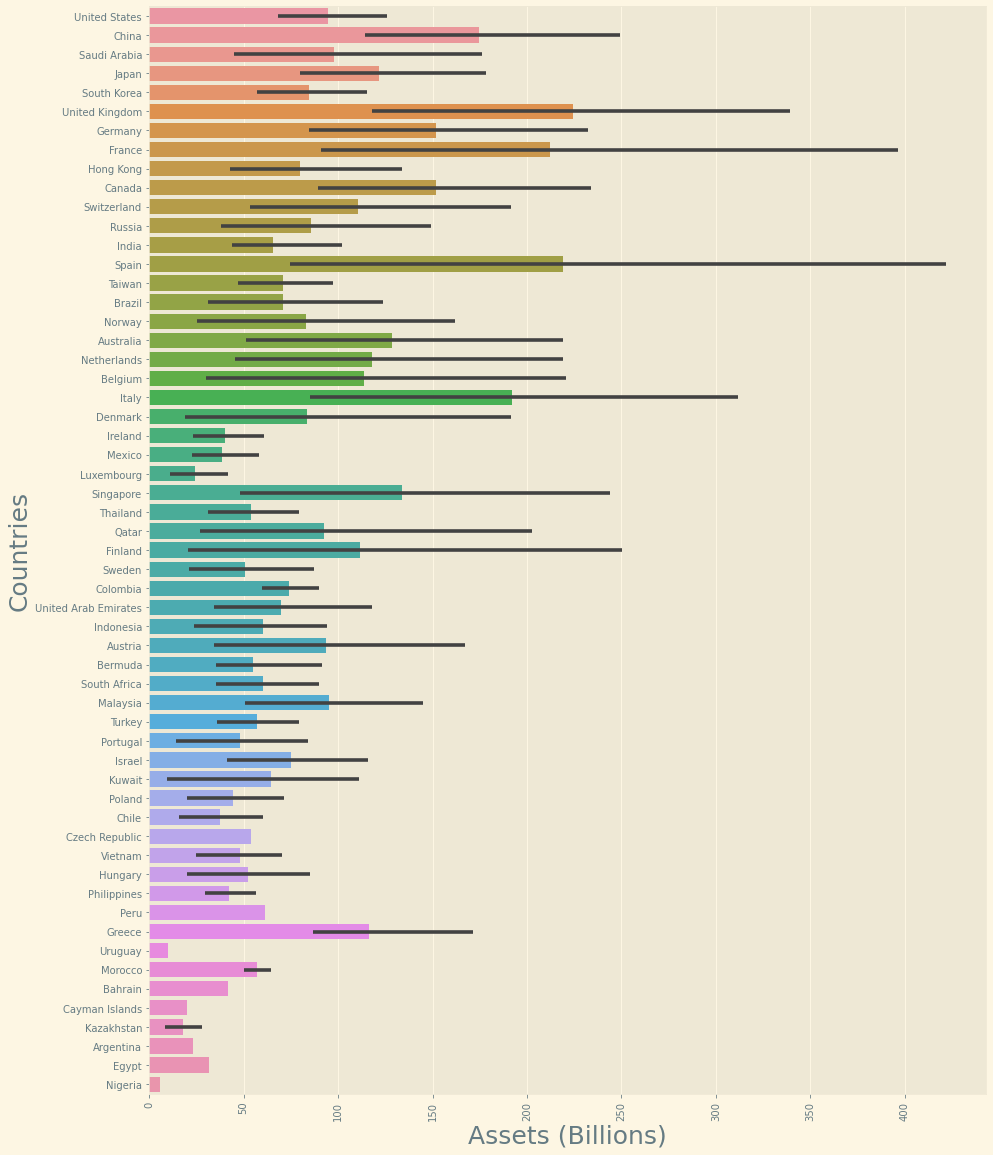

In [22]:
plt.figure(figsize=(15,20))
sns.barplot(data=df, x = "Assets (Billions)", y = "Country")
plt.xticks(rotation=90)
plt.xlabel("Assets (Billions)", fontsize=25)
plt.ylabel("Countries", fontsize=25)
plt.show()


#### Market Value per Country

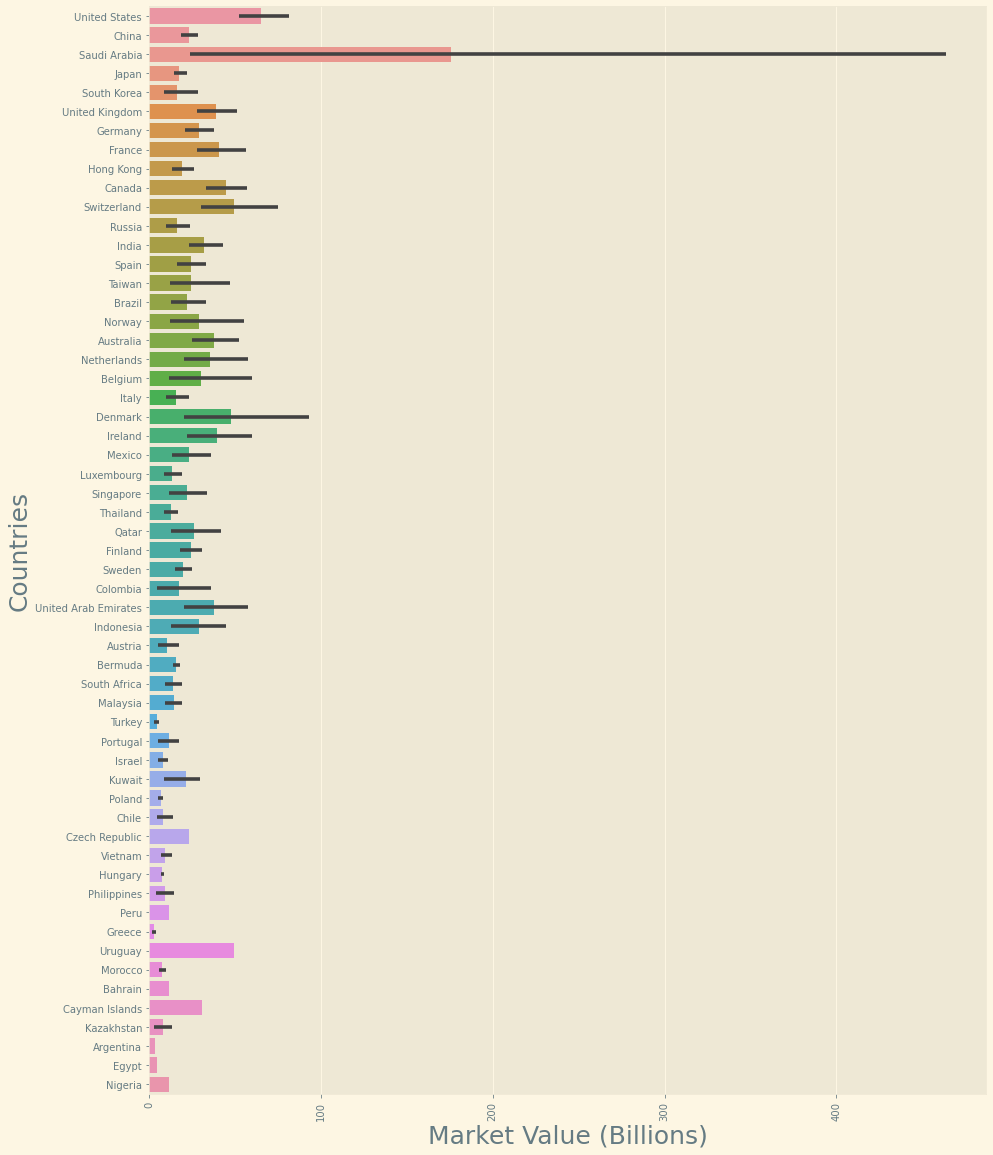

In [23]:
plt.figure(figsize=(15,20))
sns.barplot(data=df, x = "Market Value (Billions)", y = "Country")
plt.xticks(rotation=90)
plt.xlabel("Market Value (Billions)", fontsize=25)
plt.ylabel("Countries", fontsize=25)
plt.show()

### Detailed analysis of revenue, profit, assets and market value of companies depending on the field of activity

#### Revenue per Industry

Text(0, 0.5, 'Industries')

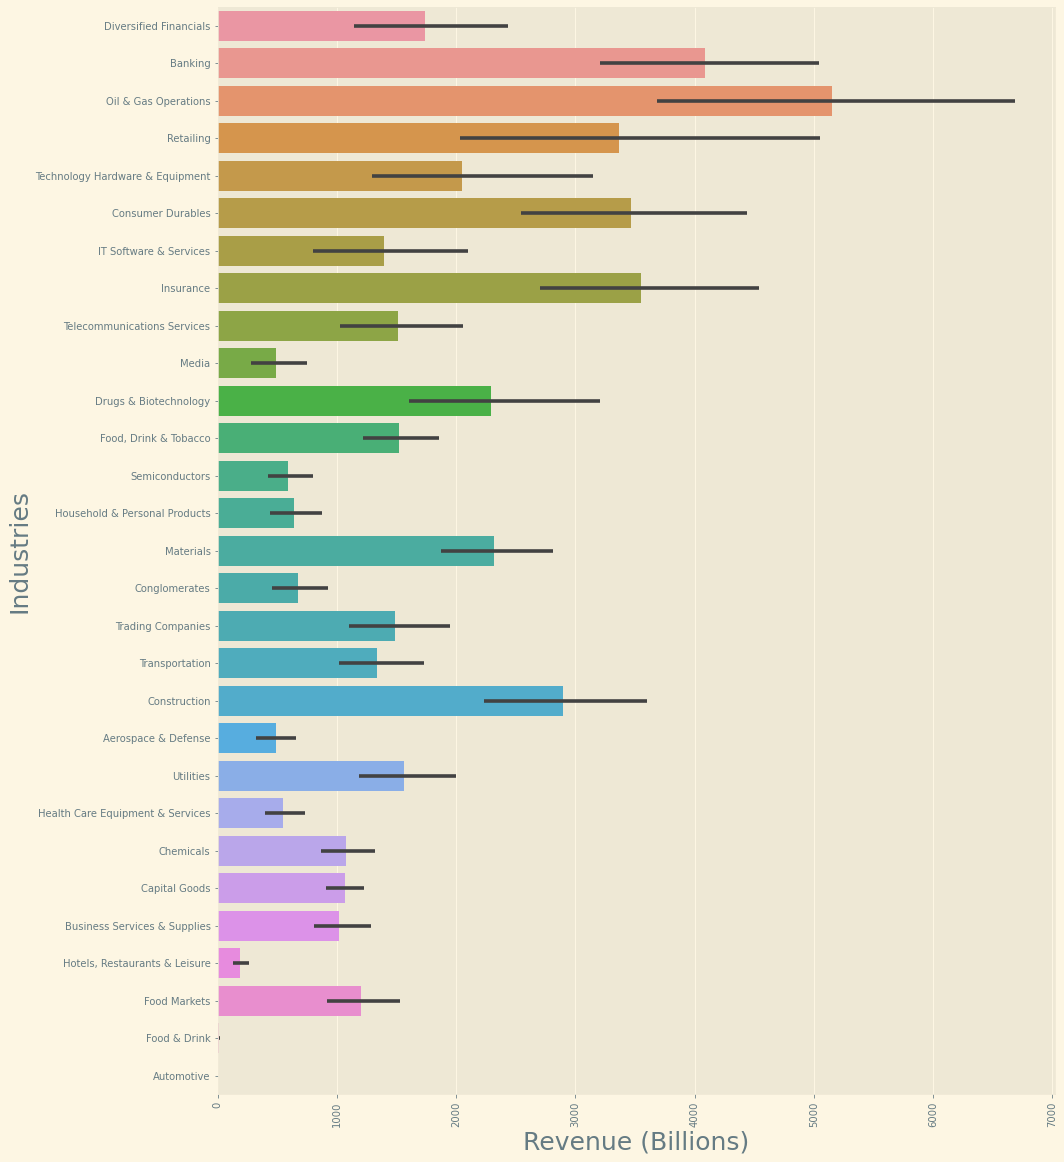

In [24]:
plt.figure(figsize=(15,20))
sns.barplot(data=df, x = "Revenue (Billions)", y = "Industry",estimator = sum)
plt.xticks(rotation=90)
plt.xlabel("Revenue (Billions)", fontsize=25)
plt.ylabel("Industries", fontsize=25)

#### Profits per Industry

Text(0, 0.5, 'Industries')

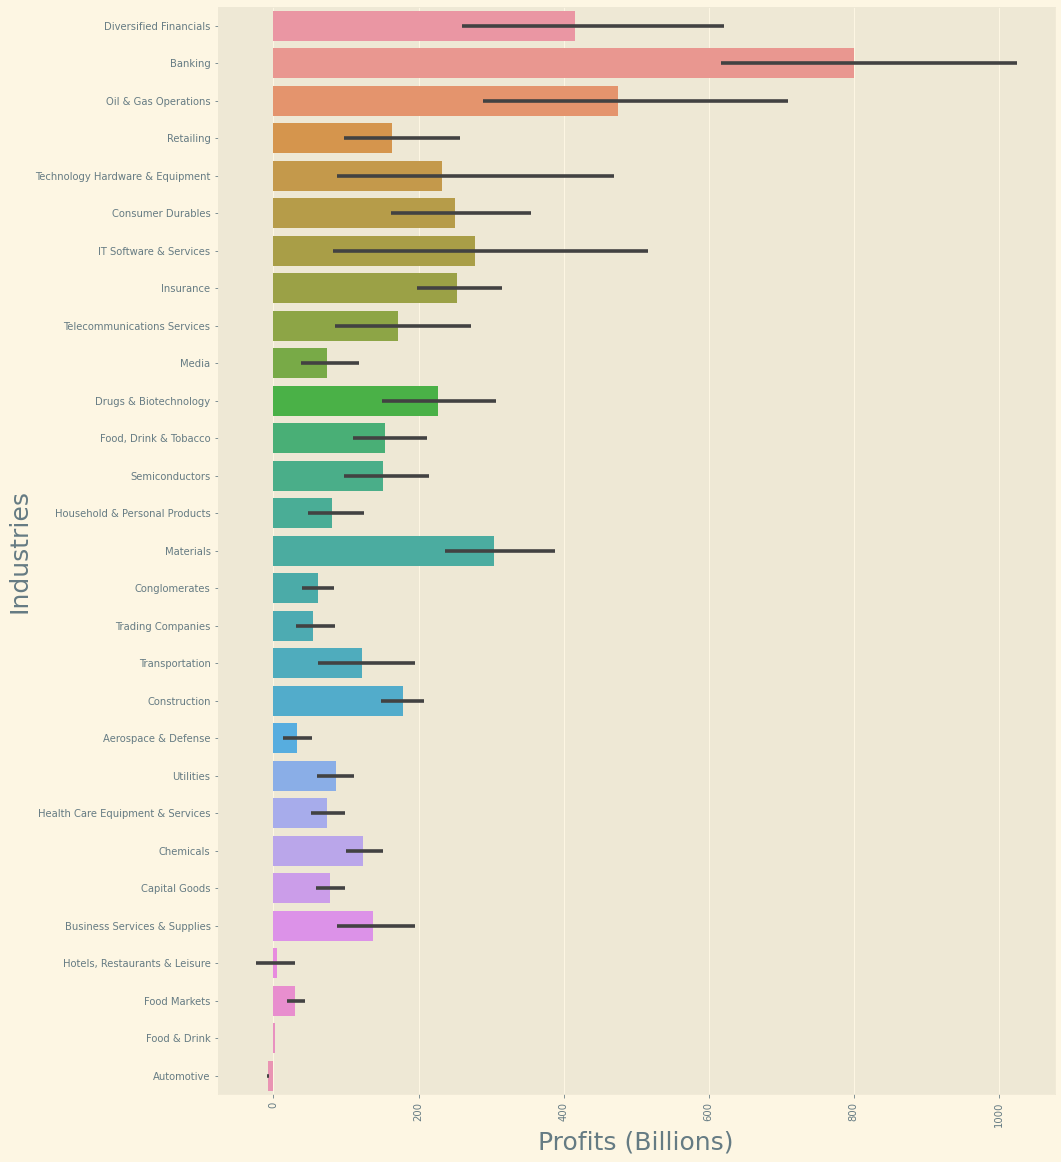

In [25]:
plt.figure(figsize=(15,20))
sns.barplot(data=df, x = "Profits (Billions)", y = "Industry",estimator = sum)
plt.xticks(rotation=90)
plt.xlabel("Profits (Billions)", fontsize=25)
plt.ylabel("Industries", fontsize=25)

#### Assets per Industry

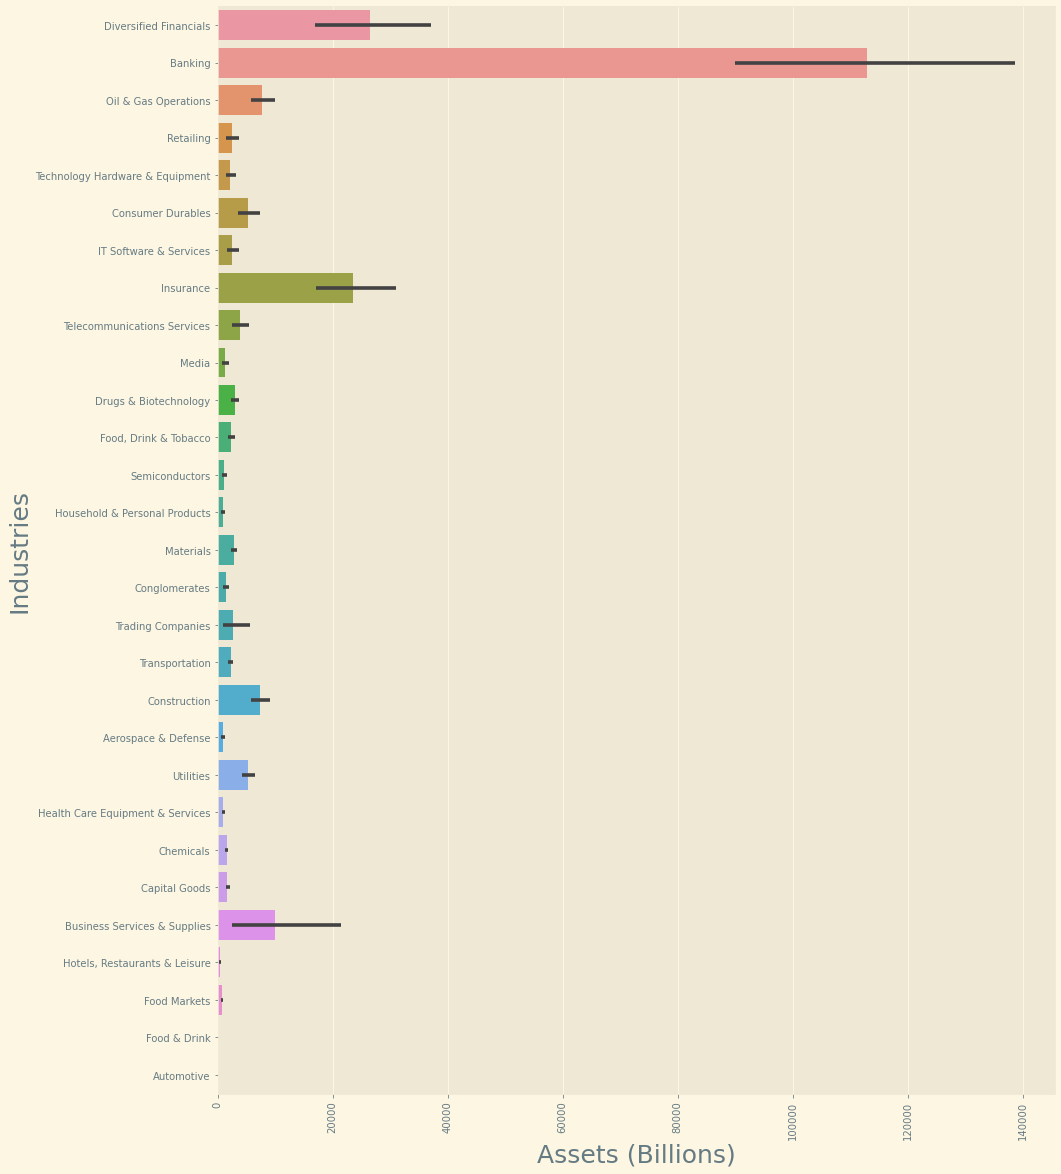

In [26]:
plt.figure(figsize=(15,20))
sns.barplot(data=df, x = "Assets (Billions)", y = "Industry",estimator = sum)
plt.xticks(rotation=90)
plt.xlabel("Assets (Billions)", fontsize=25)
plt.ylabel("Industries", fontsize=25)
plt.show()

#### Market Value per Industry

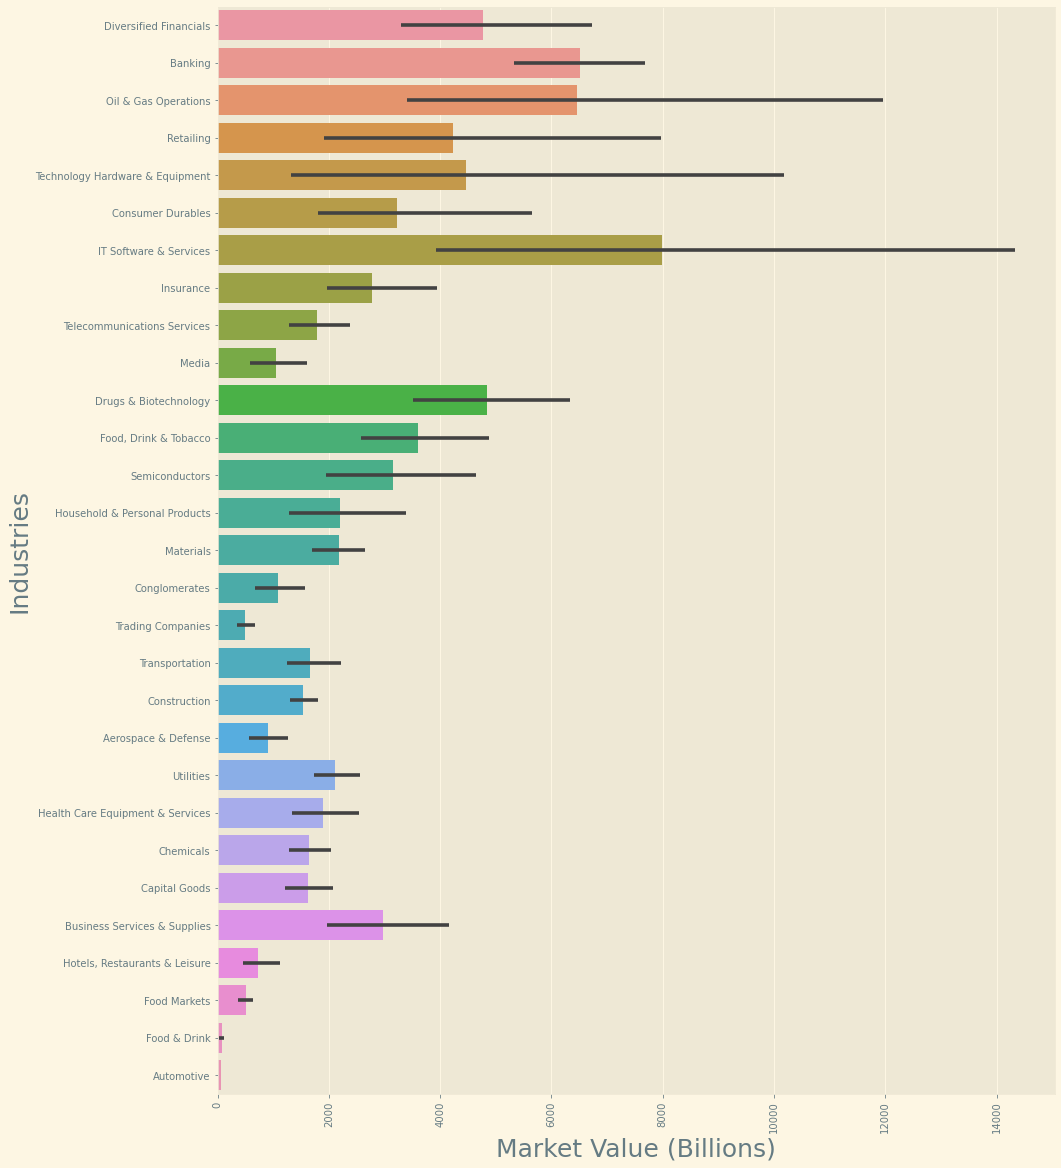

In [27]:
plt.figure(figsize=(15,20))
sns.barplot(data=df, x = "Market Value (Billions)", y = "Industry",estimator = sum)
plt.xticks(rotation=90)
plt.xlabel("Market Value (Billions)", fontsize=25)
plt.ylabel("Industries", fontsize=25)
plt.show()

### Detailed analysis of revenue, profit, assets and market value of companies in all countries, depending on the industry

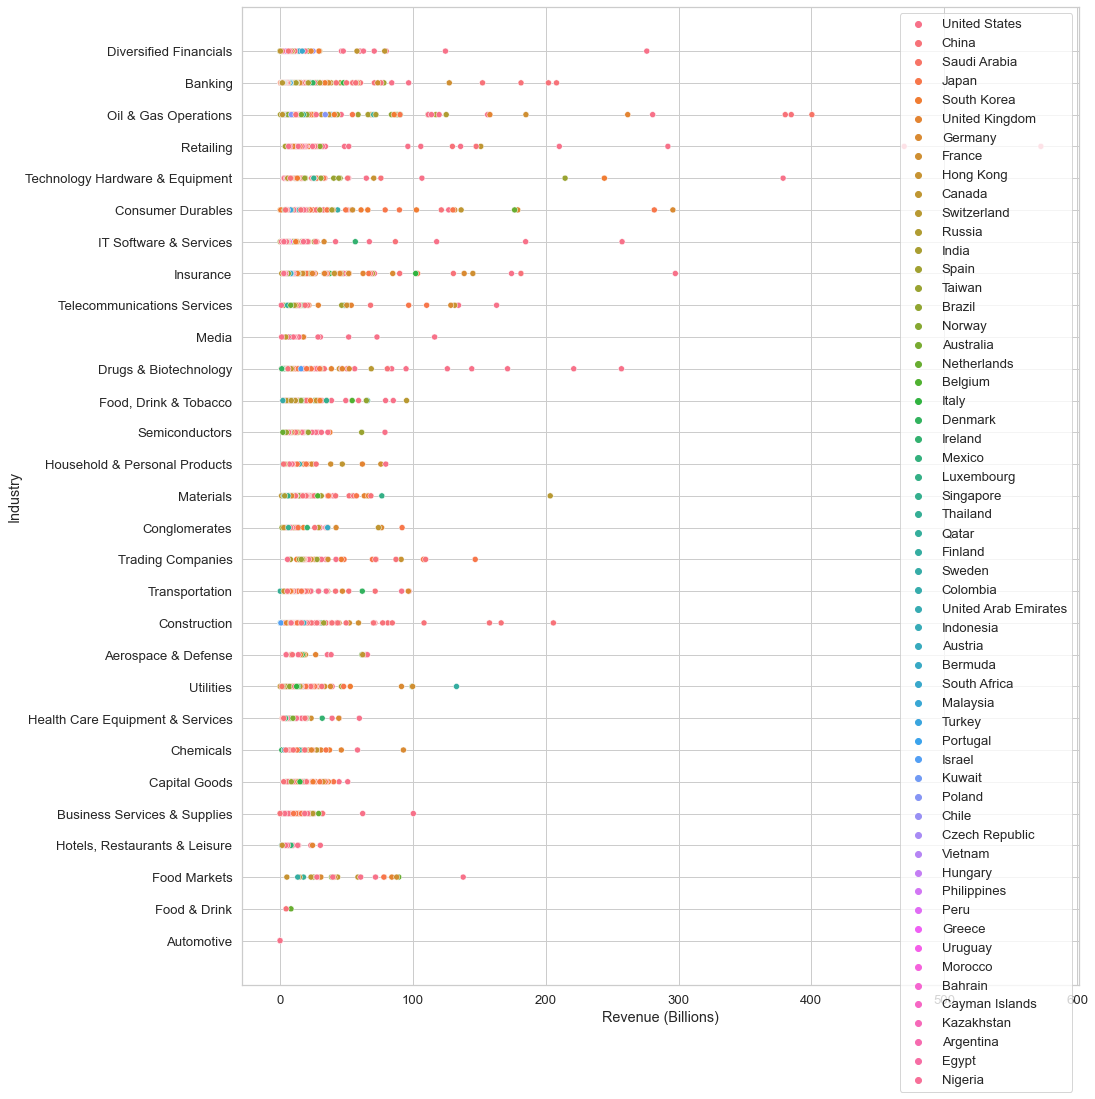

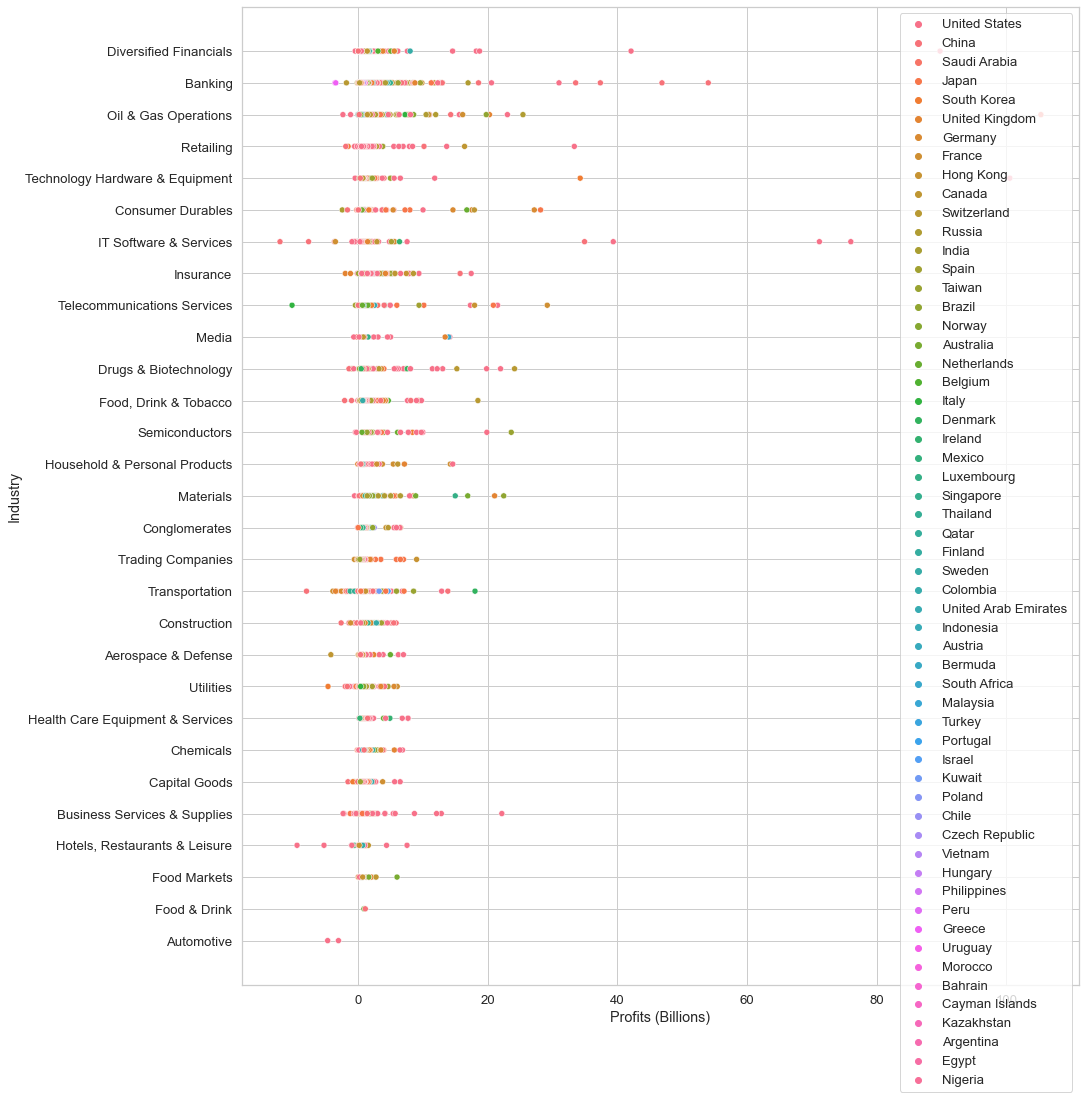

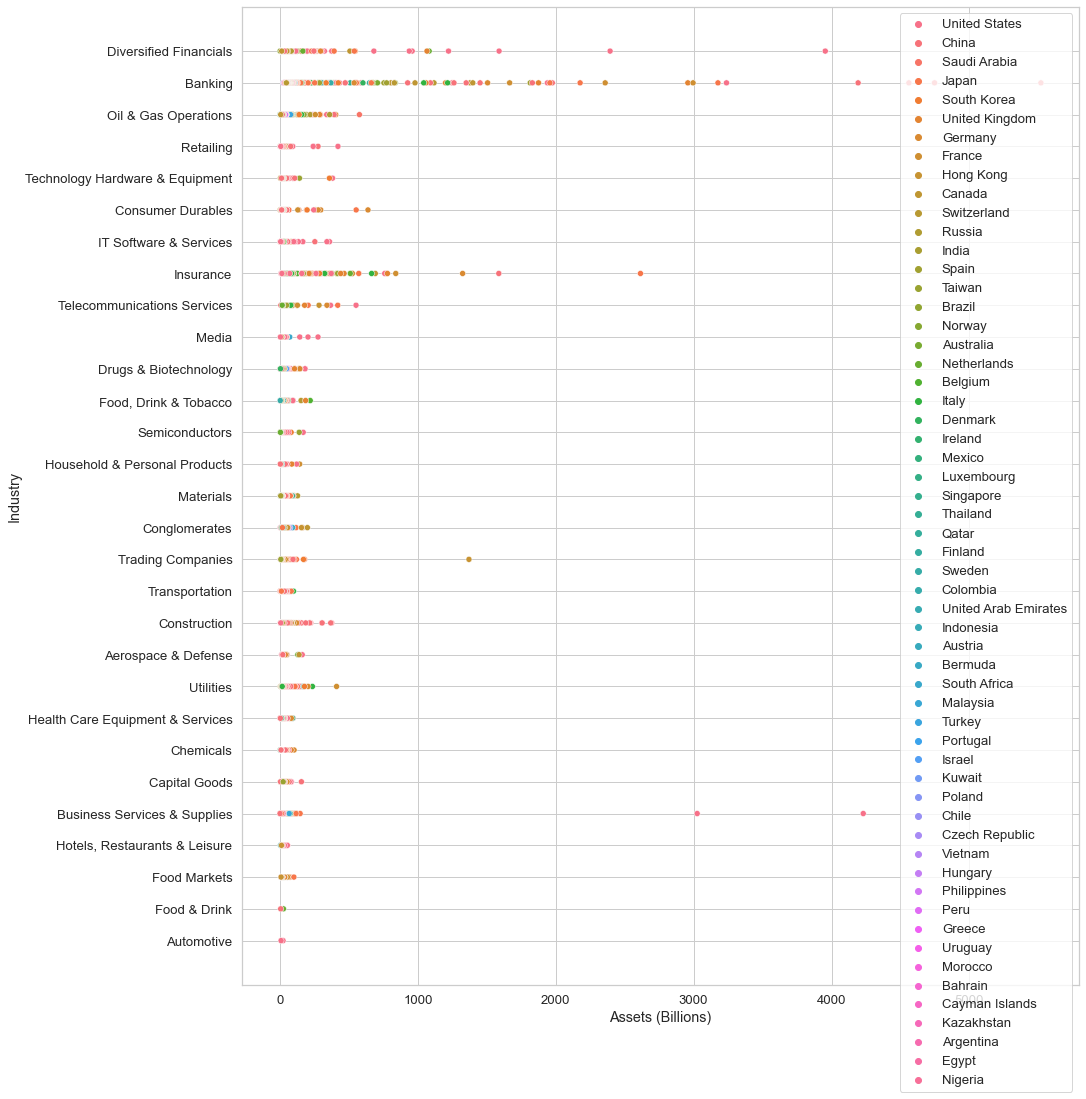

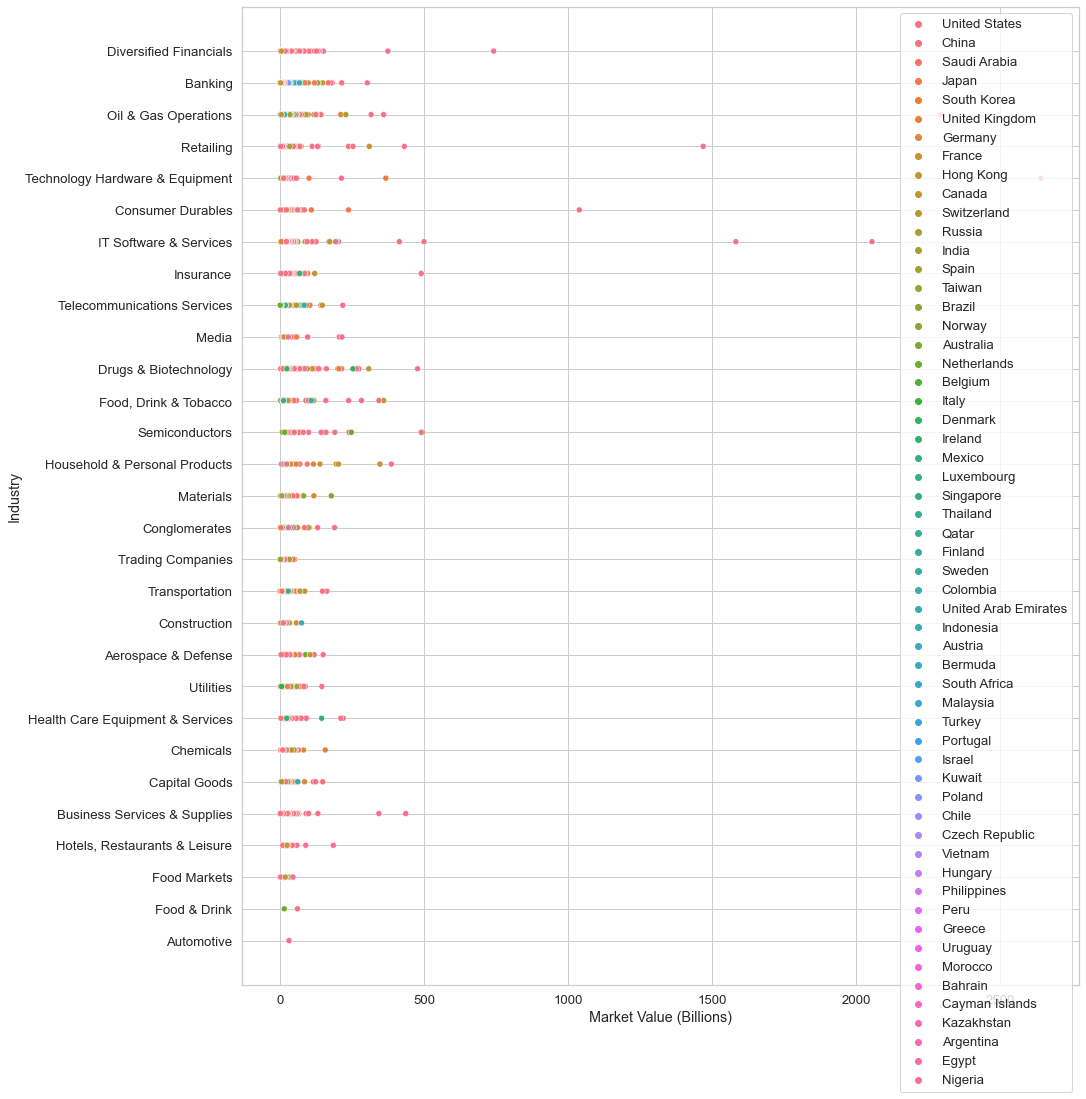

In [28]:
sns.set_theme(style="whitegrid", font_scale=1.2) 
plt.figure(figsize=(15,18))
sns.scatterplot(data=df,x="Revenue (Billions)",y="Industry",hue="Country")
plt.legend(loc='upper right')
plt.show()

sns.set_theme(style="whitegrid",font_scale=1.2) 
plt.figure(figsize=(15,18))
sns.scatterplot(data=df,x="Profits (Billions)",y="Industry",hue="Country")
plt.legend(loc='upper right')
plt.show()

sns.set_theme(style="whitegrid",font_scale=1.2) 
plt.figure(figsize=(15,18))
sns.scatterplot(data=df,x="Assets (Billions)",y="Industry",hue="Country")
plt.legend(loc='upper right')
plt.show()

sns.set_theme(style="whitegrid",font_scale=1.2) 
plt.figure(figsize=(15,18))
sns.scatterplot(data=df,x="Market Value (Billions)",y="Industry",hue="Country")
plt.legend(loc='upper right')
plt.show()

### Correlations

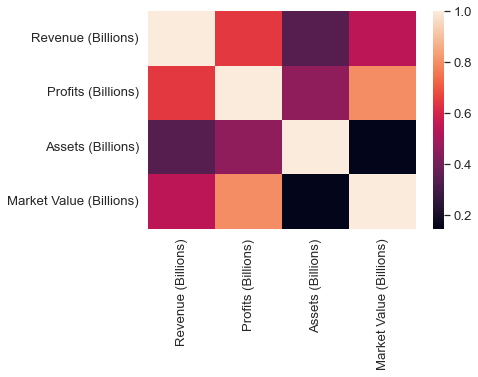

In [29]:
sns.heatmap(df[['Revenue (Billions)', 'Profits (Billions)', 'Assets (Billions)', 'Market Value (Billions)']].corr())
plt.show()

In [30]:
import phik

ModuleNotFoundError: No module named 'phik'